In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv('Income_spent.csv')

In [4]:
data.head()

,INCOME,SPEND
0,233,150
1,250,187
2,204,172
3,236,178
4,354,163


In [5]:
data.tail()

,INCOME,SPEND
298,241,123
299,264,132
300,193,141
301,131,115
302,236,174


In [6]:
data.shape

(303, 2)

- There are 303 observations or rows and 2 columns


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   INCOME  303 non-null    int64
 1   SPEND   303 non-null    int64
dtypes: int64(2)
memory usage: 4.9 KB


- There are no missing enries in the dataset
- Let us confirm this with another line of code

In [8]:
data[data.isnull()].any()

INCOME    False
SPEND     False
dtype: bool

- See there are no missing values


In [9]:
data[data.duplicated()]

,INCOME,SPEND
118,204,172
164,175,173
228,288,159
230,243,152
261,230,160
265,212,132
270,249,144


In [36]:
x=data['INCOME'].values
x

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 239, 234, 233, 226, 243, 199, 302,
       212, 175, 417, 197, 198, 177, 219, 273, 213, 177, 304, 232, 269,
       360, 308, 245, 208, 264, 321, 325, 235, 257, 216, 234, 256, 302,
       231, 141, 252, 201, 222, 260, 182, 303, 265, 309, 186, 203, 211,
       183, 222, 234, 220, 209, 258, 227, 204, 261, 213, 250, 245, 221,
       205, 240, 250, 308, 318, 298, 265, 264, 277, 197, 214, 248, 255,
       207, 223, 288, 160, 226, 394, 233, 315, 246, 244, 270, 195, 240,
       196, 211, 234, 236, 244, 254, 325, 126, 313, 211, 262, 215, 214,
       193, 243, 303, 271, 268, 267, 199, 210, 204, 277, 196, 269, 201,
       271, 295, 235, 306, 269, 178, 208, 201, 263, 295, 303, 209, 223,
       197, 245, 242, 240, 226, 180, 228, 149, 227, 278, 220, 197, 253,
       192, 220, 221, 240, 342, 157, 175, 286, 229, 268, 254, 203, 256,
       229, 284, 224, 206, 167, 230, 335, 177, 276, 353, 225, 33

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
data[data.duplicated()].any()

INCOME    False
SPEND     False
dtype: bool

- There are no duplicated values or missing entries, we can now proceed and analyze the data

##### EDA 

Skew : 0.51
INCOME


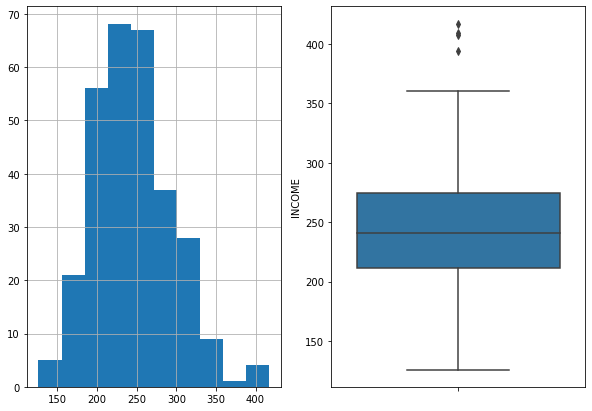

Skew : -0.53
SPEND


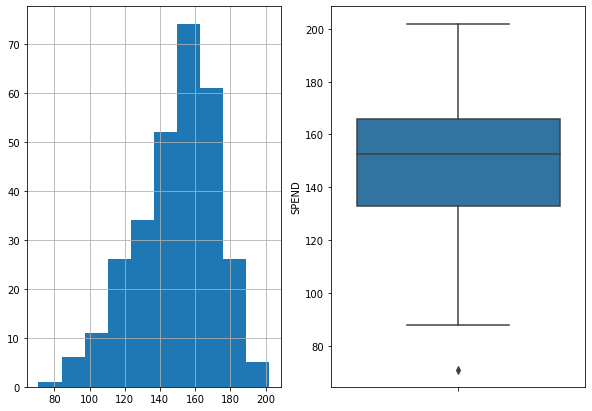

In [12]:
for col in data.columns:
    print('Skew :', round(data[col].skew(),2))
    print(col)
    plt.figure(figsize=(10,7))
    plt.subplot(1,2,1)
    data[col].hist(bins=10)
    plt.subplot(1,2,2)
    sns.boxplot(y=data[col])
    plt.show()

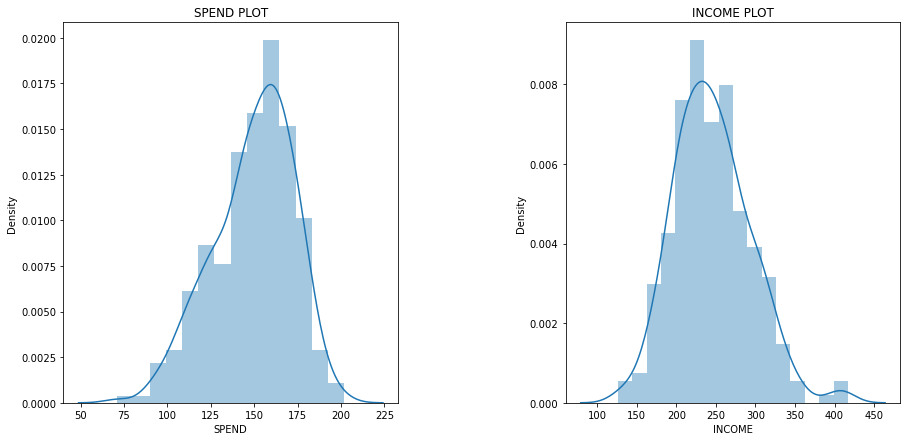

In [13]:
#lets visualize using a distribution plot
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.distplot(data['SPEND'])
plt.title('SPEND PLOT')
plt.subplot(1,2,2)
sns.distplot(data['INCOME'])
plt.title('INCOME PLOT')
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()


**Observations**
- From the above plots we can conclude that:

  spend is left skewed with outliers to the left
  
  Similarly income has outliers to the right and is relatively skewed to the right.

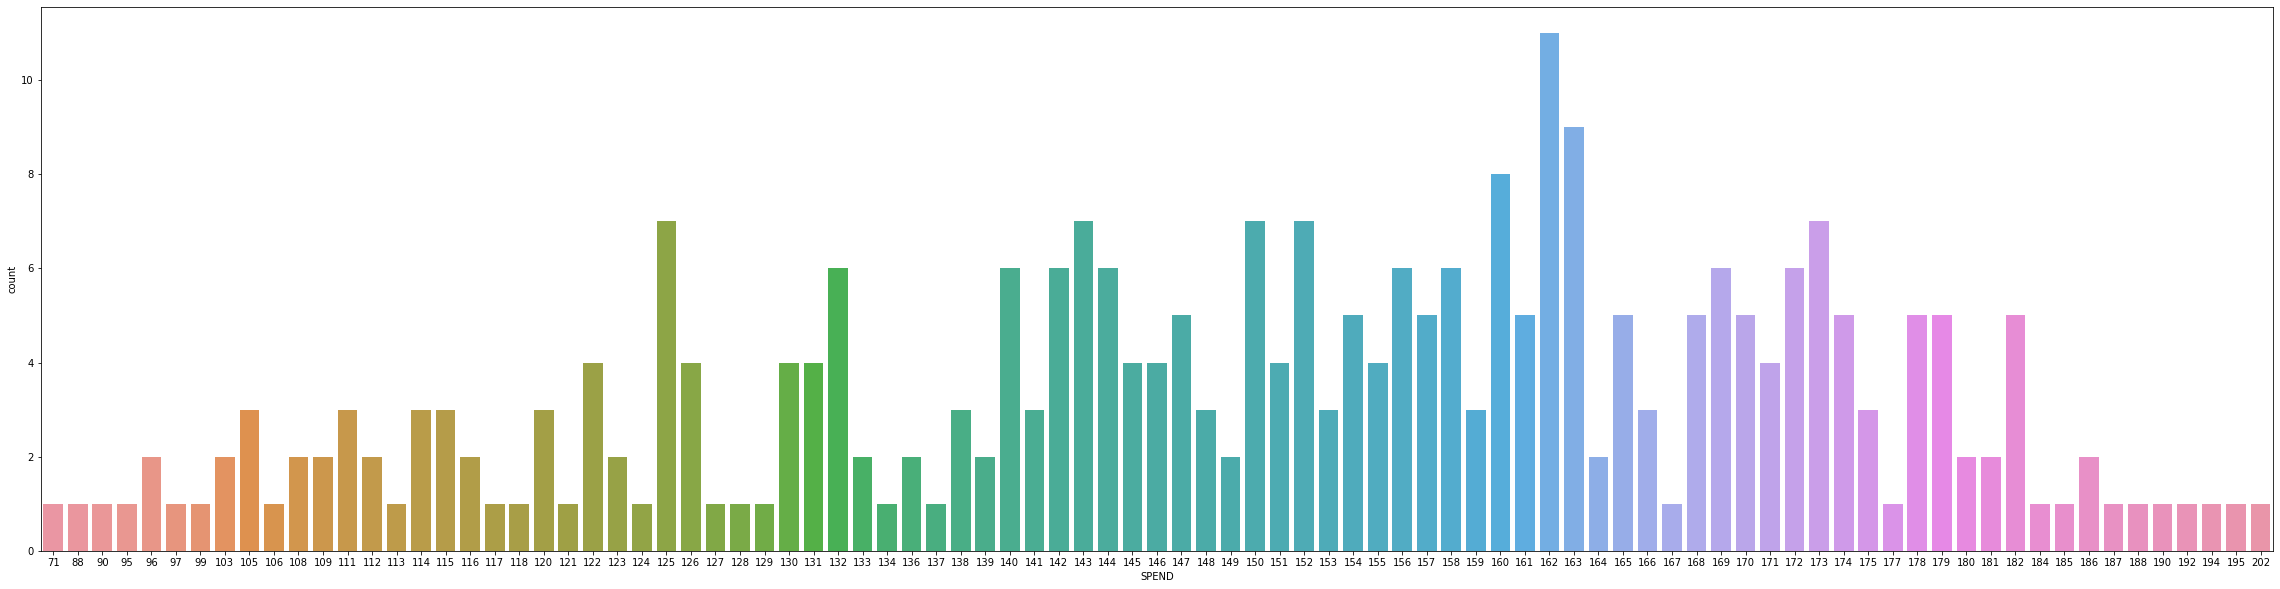

In [14]:
#lets look at the counts of each observations
plt.figure(figsize=(40,10))
sns.countplot(data['SPEND'])
plt.show()

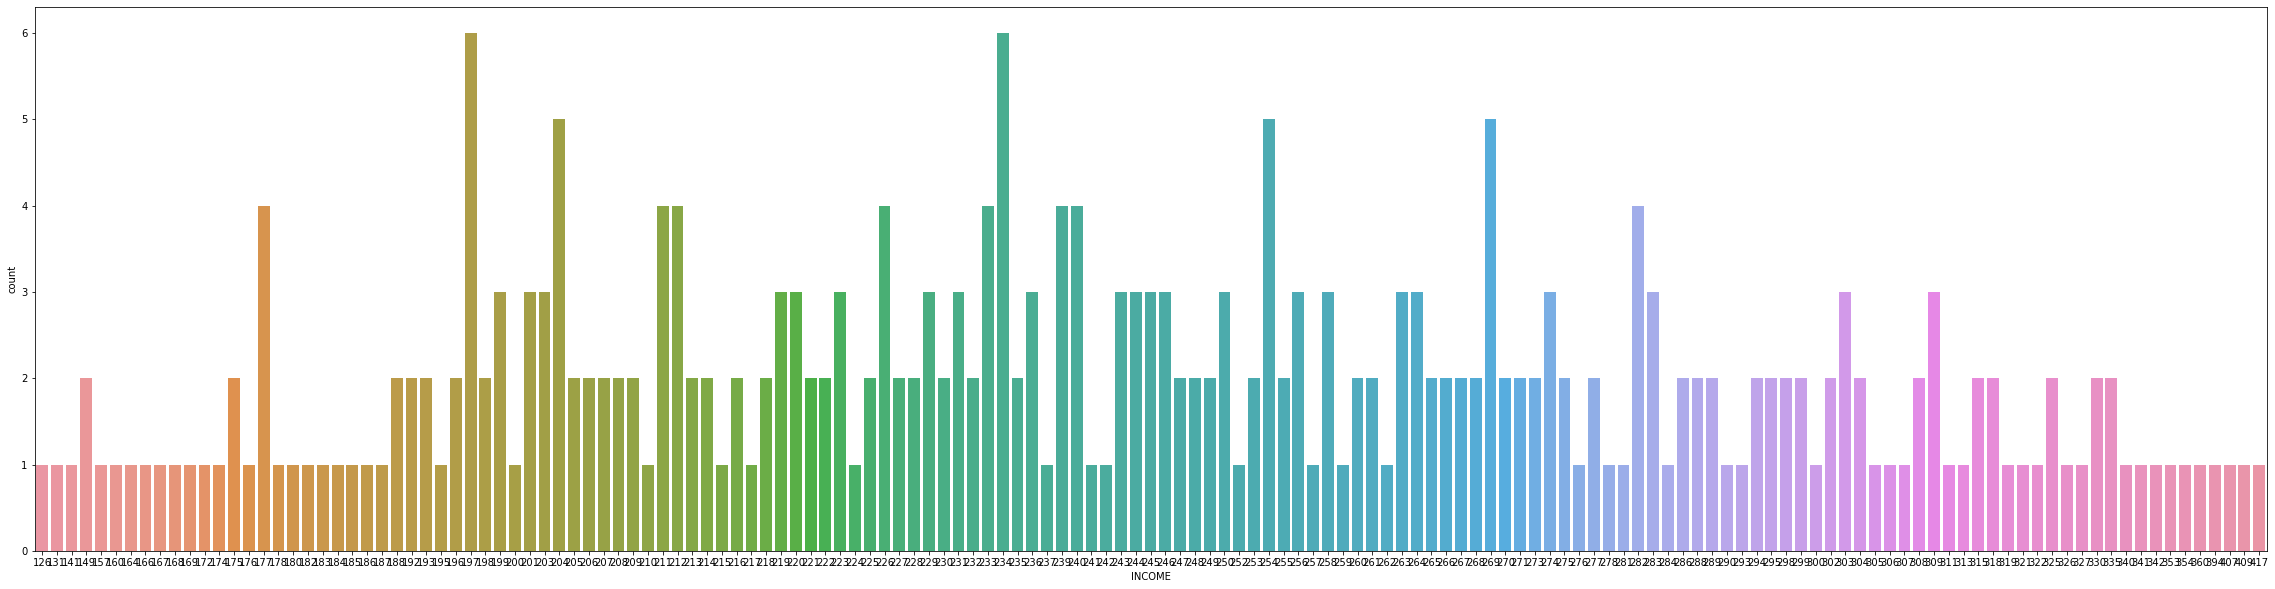

In [15]:
plt.figure(figsize=(40,10))
sns.countplot(data['INCOME'])
plt.show()

**Observations**
- The highest count on spend ranges between 150-170
- The highest count on income ranges between 170-270


<AxesSubplot:>

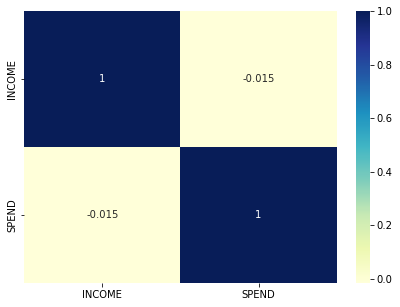

In [16]:
#checking for correlation
plt.figure(figsize=(7,5))
sns.heatmap(data.corr(),annot=True,cmap='YlGnBu')

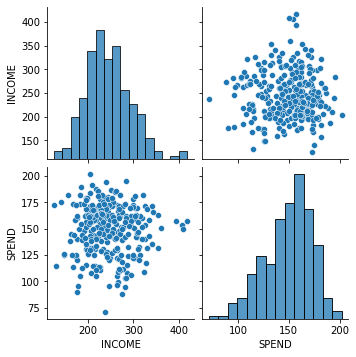

In [17]:
sns.pairplot(data)

**Observations**
- There exist no relationship between the variables

##### Now that we are done with data preprocessing and visualization lets start on buliding the model 

In [18]:
#scaling the data and convert in to a dataframe.
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [19]:
data_scaled.head()

,INCOME,SPEND
0,-0.260357,0.021868
1,0.089100,1.629209
2,-0.856489,0.977584
3,-0.198688,1.238234
4,2.226956,0.586609


In [20]:
#now we need to find the number of clusters but we need to make a copy of the scaled data
data_scaled_copy=data_scaled.copy()


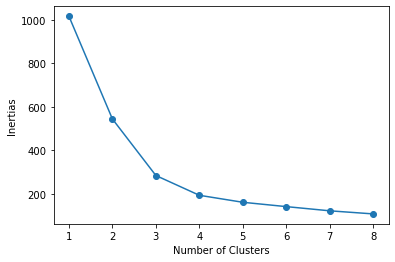

In [34]:
inertias=[]
ks = range(1,9)
for k in ks :
    model=KMeans(n_clusters=k)
    model.fit(data_scaled_copy)
    inertias.append(model.inertia_)
plt.plot(ks,inertias,'-o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertias')
plt.xticks(ks)
plt.show()
    

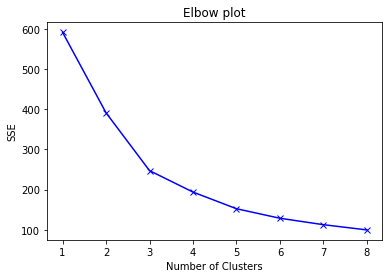

In [30]:
sse={}
for k in range(1,9):
    kmeans=KMeans(n_clusters=k,random_state=1).fit(data_scaled)
    sse[k]=kmeans.inertia_
    
plt.plot(list(sse.keys()),list(sse.values()),'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow plot')
plt.show()

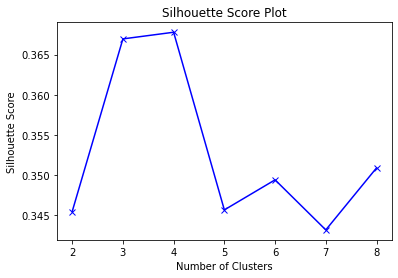

In [22]:
sc={}
for d in range(2,9):
    kmeans=KMeans(n_clusters=d,random_state=1).fit(data_scaled)
    labels=kmeans.predict(data_scaled)
    sc[d]=silhouette_score(data_scaled,labels)
    
plt.plot(list(sc.keys()),list(sc.values()),'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Plot')
plt.show()
    

**Observations**
- We can conclude that the right number of clusters to choose is 4 as the silhouette score is high at this point.

### K-MEANS  

In [23]:
km=KMeans(n_clusters=4,random_state=1).fit(data_scaled)

In [24]:
#we then need to add the labels to the original dataset and the scaled
data_scaled_copy['kmeans_labels']=km.predict(data_scaled)
data['kmeans_labels']=km.predict(data_scaled)
ymeans=km.fit_predict(data_scaled)


In [25]:
data.kmeans_labels.value_counts()

0    136
3     60
2     53
1     47
Name: kmeans_labels, dtype: int64

In [26]:
data.shape

(296, 3)

In [27]:
mean=data.groupby('kmeans_labels').mean()
median=data.groupby('kmeans_labels').median()
#convert to a dataframe
kmeans_df=pd.concat([mean,median],axis=0)
kmeans_df.index=['g_o mean','g_1 mean','g_2 mean','g_3 mean','g_o median','g_1 median','g_2 median','g_3 median']
kmeans_df.T

,g_o mean,g_1 mean,g_2 mean,g_3 mean,g_o median,g_1 median,g_2 median,g_3 median
INCOME,225.889706,273.93617,196.924528,311.400000,231.0,269.0,201.0,304.0
SPEND,164.845588,119.12766,127.773585,157.683333,163.0,122.0,130.0,157.0


**Observations**

- Apparently all customers seem to spend less than what they earn, the difference is in their spending where some spend more than others i.e cluster 0 has the highest spenders,followed by 3,2 and 1 respectively. 
- We an conclude these customers are wise spenders as they dont spend anyhow.

#### Visualization of the Customers Clusters and their centers 

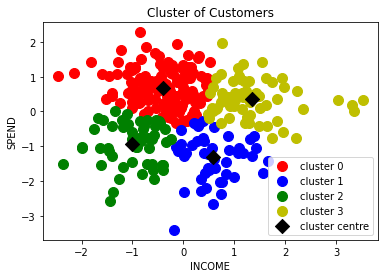

In [29]:
#plt.figure(figsize=(15,7))

x=np.array(data_scaled_copy)

plt.scatter(x[ymeans==0, 0], x[ymeans==0, 1], c='r', label='cluster 0', s=100)
plt.scatter(x[ymeans==1, 0], x[ymeans==1, 1], c='b', label='cluster 1', s=100)
plt.scatter(x[ymeans==2, 0], x[ymeans==2, 1], c='g', label='cluster 2', s=100)
plt.scatter(x[ymeans==3, 0], x[ymeans==3, 1], c='y', label='cluster 3', s=100)

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=100,c='black',label='cluster centre',marker='D')
plt.legend()
plt.xlabel('INCOME')
plt.ylabel('SPEND')
plt.title('Cluster of Customers')

plt.show()